In [34]:
import pandas as pd
from global_config import *
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv(TRAIN_PATH)
print(f'unique col = {df.columns.tolist()},\n'
      f'shape dataframe = {df.shape},\n'
      f'is na = {df.isna().sum().sum()}\n')
df

unique col = ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
shape dataframe = (159571, 8),
is na = 0



,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0



Number of positive examples per class:
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


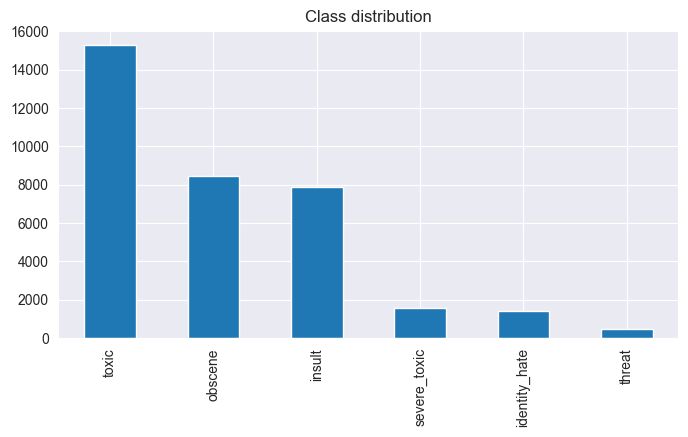

In [36]:
label_cols = TARGET_COL
class_counts = df[label_cols].sum().sort_values(ascending=False)
print("\nNumber of positive examples per class:")
print(class_counts)
class_counts.plot(kind="bar", figsize=(8,4), title="Class distribution")
plt.show()


Average comment length: 394.0732213246768
Median comment length: 205.0
Maximum comment length: 5000


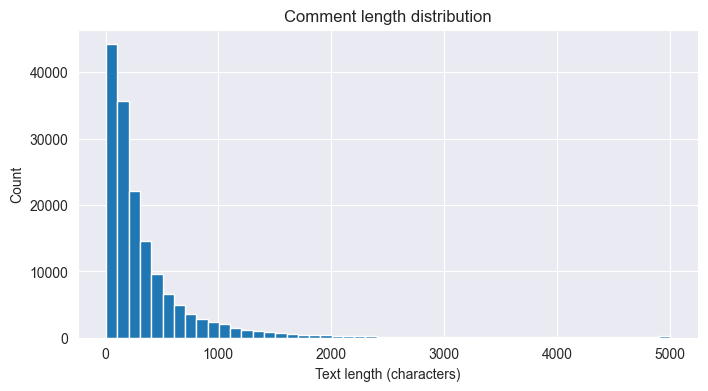

In [37]:
df["len"] = df["comment_text"].str.len()
print("\nAverage comment length:", df["len"].mean())
print("Median comment length:", df["len"].median())
print("Maximum comment length:", df["len"].max())

df["len"].hist(bins=50, figsize=(8,4))
plt.title("Comment length distribution")
plt.xlabel("Text length (characters)")
plt.ylabel("Count")
plt.show()


In [38]:
print("\nNon-toxic examples:\n")
for text in df.loc[df[label_cols].sum(axis=1) == 0, "comment_text"].sample(5, random_state=42):
    print("-", text, "\n\n")

print("\nToxic examples:\n")
for text in df.loc[df["toxic"] == 1, "comment_text"].sample(5, random_state=42):
    print("-", text, "\n\n")



Non-toxic examples:

- "

Oh, don't worry about me, Sandstein. I'm of no strong opinion as to what is ""well."" Editing Wikipedia is not a personal benefit; if it were, I'd be COI! I do have some unfinished business, both with articles and ""arbitration or sanctions,"" such as the RfAr/Clarification and a dispute over my last block, which was ostensibly about the sanction and which I hope can be resolved without much fuss. On the other hand, I hoped that in the past as well, but I can't control how others respond. I understand your recommendation and see it as well-motivated. Thanks.   " 


- Are you trying to dispute that fact? 


- SWOT analysis 

This source – Align Technology, Inc. SWOT Analysis. (2013). 1-8. – is used 11 times, with no indication of how to find it or whether it's a primary source (I assume it is), so I'm going to remove anything sourced to it. Leaving this note in case there are objections.  (talk) 


- cover 

so, do we want a current or older cover? i have the 